## Advection

### Introduction
Note: the lecture materials are loosely based on a course on atmospheric modeling by Prof. N. Van Lipzig

- **What is advection?** Advection is a transport mechanism of a substance or conserved property by a fluid due to the fluid's bulk motion (Wallace and Hobbs, 2006).

- **Examples:**  What can be advected: temperature, moisture, aerosols, ...

- **Why discretise?** Because not for all solutions the analytical solution is known, in fact, most of the time it is not known. Especially in the field of earth sciences where sets of simultaneous, nonlinear, partial differential equations has to be solved using known analytical methods. To solve such coupled equations, numerical computational methods are required to discretize and solve the PDE's on a lattice. In this notebook, we will only deal with a finite difference scheme, using the simplest form of a truncated Taylor series expansion. Many alternative methods are available to solve PDE's. Nevertheless, many models in geosciences use finite difference methods, because of their conceptual simplicity and ease of coding.

### The advection equation###

A concepturally very simple PDE is the Advection Equation: 

$$\frac{\partial C}{\partial t} = -v \frac{\partial C}{\partial x}
\label{eq:1}\tag{1}$$

where $C$ is the aerosol concentration and $v$ is a constant windspeed at which aerosol concentrations are advected. The equation above is a prototype of an **initial value problem**: The solution is obtained by using the known initial values and marching or advancing in time. The solution of this equation can be obtained directly from the initial conditions:

$$ C(x,t) = C(x-vt,0) \label{eq:2}\tag{2}$$

In the following we will discretize Eq. $\ref{eq:1}$ using a first order, finite difference upwind scheme. The Finite Difference Equation (FDE) of Eq. $\ref{eq:1}$ can be written as:

$$\frac{\tilde{C}_j^{n+1} - \tilde{C}_j^n}{\Delta t} + c
\frac{\tilde{C}_j^n - \tilde{C}_{j-1}^n}{\Delta x} = 0
\label{eq:3}\tag{3}$$

To obtain this equation, we have taken discrete values for $x$ and $t$: $x_j=j\Delta x$, $t_n = n \Delta t$. The solution of the finite difference equation is also defined at the discrete points ($j\Delta x$,$n \Delta t$): $\tilde{T}_j^n=\tilde{T}(j\Delta x,n \Delta t)$. Note that we will use T to denote the solution of the PDE
(continuous) and $\tilde{T}$ to denote the solution of the finite difference equation (FDE), a discrete solution.

# TODO insert stencil



Analytical solution
Start from the analytical solution of the advection equation
Wind speed = 36 km/h (= 10 m/s)
Plot the wave after 5 hours

Numerical solution
Transform the discrete solution of the advection equation
Use a time step of 10 seconds
Use a loop to obtain your result (while or for loop?) 
Plot the wave after 5 hours (try to plot at every time step to see the evolution)
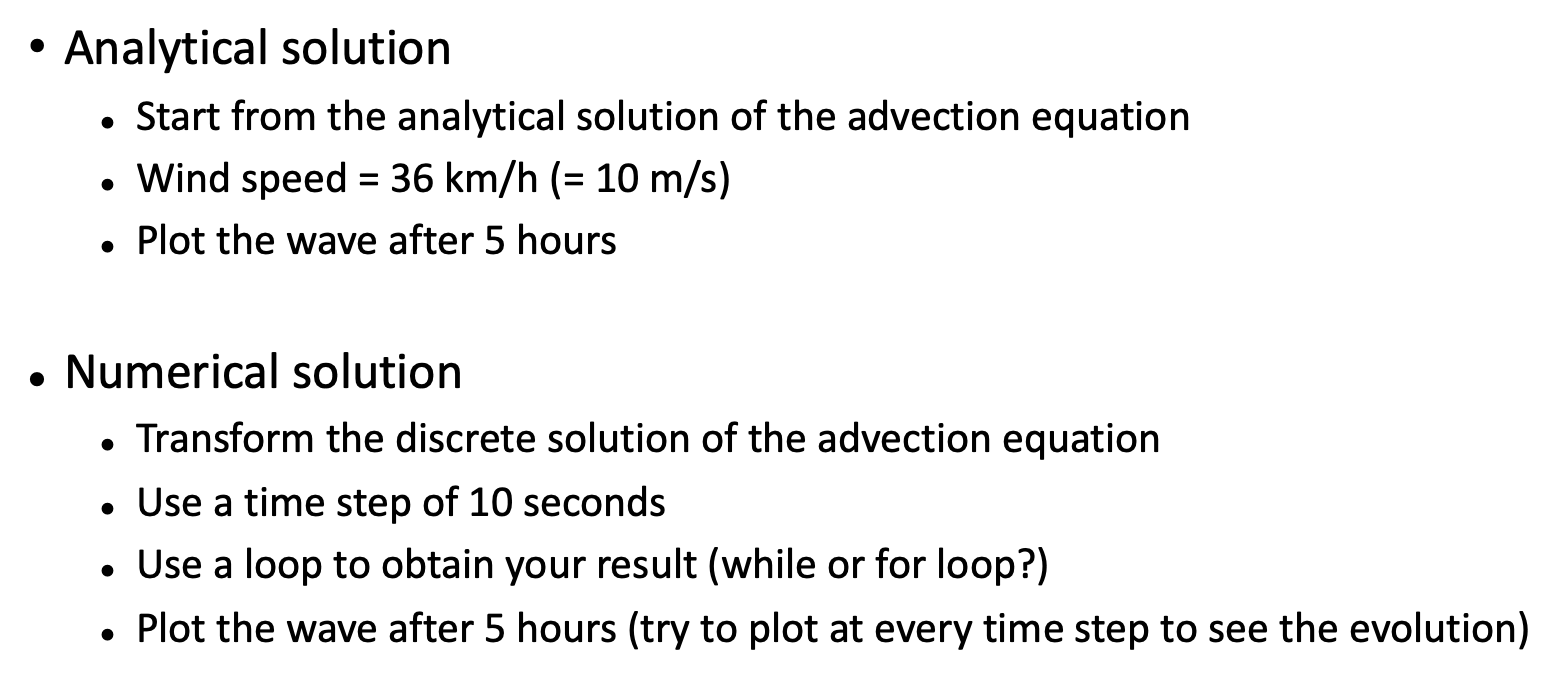


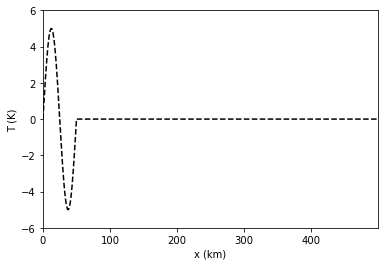

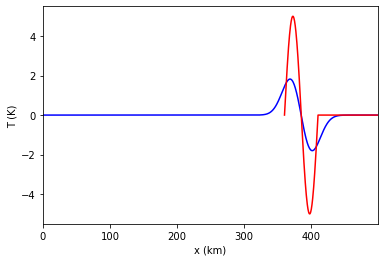

In [1]:
# --------------------------------------------------------------------
# Script to calculate the temperature anomaly of a discrete, 
# sine shaped perturbation and visualise the result
# --------------------------------------------------------------------
                          
# --------------------------------------------------------------------
# initialisation
# --------------------------------------------------------------------
import numpy as np
from matplotlib import pyplot as plt

# initialisation of model constants
dx     = 500       # spatial step in m = .5km
lam    = 100*dx    # wavelength
nr     = 1e3       # size of the domain
ampl   = 5         # amplitude (K)


# initialisation of variables (including scalars, arrays and matrices)
x = np.arange(start= 0, stop = (nr-1)*dx , step = dx)
# Logical operations
b = x <= lam
c = x >  lam
# print(c)

# --------------------------------------------------------------------
# manipulations
# --------------------------------------------------------------------
# get sine wave
y    = np.zeros_like(x)
y[b] = ampl*np.sin(x[b]*2*np.pi/lam)
y[c] = 0
# --------------------------------------------------------------------
# Visualisation
# --------------------------------------------------------------------
# plot the graph
plt.figure()
plt.plot(x/1.e3, y, '--k') 
plt.ylim((-6, 6))
plt.xlim((0, max(x/1e3)))
plt.xlabel('x (km)')
plt.ylabel('T (K)')
plt.show()

# data, parameter values
u    = 10 #m/s
time = 3600 *10#in sec
dt   = 0.9*u/dx

# Numerical solution
curT = 0

T_num = np.zeros_like(y)
T_num[:] = y
while curT<time:
    curT =curT+ dt
    if u>0:
        T_diff = T_num[1:]-T_num[0:-1]
        T_num[1:] = T_num[1:] - u*dt/dx*T_diff
        # BC
        T_num[0] = T_num[-1]
    elif u<0:
        T_diff = T_num[1:]-T_num[0:-1]
        T_num[0:-1] = T_num[0:-1] - u*dt/dx*T_diff        
        # BC
        T_num[-1] = T_num[0]       
    
    if curT%2000==0: 
        plt.plot(x/1.e3, T_num, 'b') 
        plt.xlim((0, max(x/1e3)))
        plt.xlabel('x (km)')
        plt.ylabel('T (K)')
        plt.show()

plt.figure()
plt.plot(x/1.e3, T_num, 'b') 
plt.xlim((0, max(x/1e3)))
plt.xlabel('x (km)')
plt.ylabel('T (K)')

x_an = x + np.mod(time*u, max(x))
plt.plot(x_an/1.E3, y, '-r')
plt.show()




## Practice your skills: Eyjafjallajokull- Part 2

Back to the problem of the Eyjafjallajokull volcano. This time we will solve the advection diffusion equation in 1D: 

$$\frac{\partial C}{\partial t} = -v \frac{\partial C}{\partial x} + D\frac{\delta^2 C}{\delta x^2} 
\label{eq:4}\tag{4}$$

Copy past your script form the notebook where you solved the case for pure diffusion. 
Now adjust the script by adding advection. You can use the code derived in the previous blocks. 

You only need one additional model parameter: the advection velocity $v$. 
- Assume an advection velocity of 10 km/h (that is, the wind speed at which ash aerosols are advected towards the continent)
- Calculate the time step by combining the CFL criterium for advection (see above) and diffusion 
- Same question: after how many hours do we get 5 ppm ash aerosols in Brussels?

dt is: 0.045hours


<Figure size 432x288 with 0 Axes>

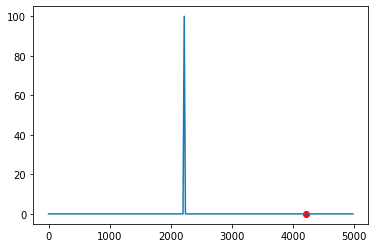

<Figure size 432x288 with 0 Axes>

In [8]:
#physics
D = 25
v = 10
Lx = 5000
time =0

#numerical properties
dx = 20
x = np.arange(start=0, stop=Lx, step=dx)
nx =len(x)
nt = 10000
nout = 1000

# Location of volcano and Brussels
ind_vol= int(2220/dx)
ind_Bru= int(4220/dx)

C_ini  = 100
C_rate = 100
Cstart = 0
Cend  = 0
C =np.zeros(x.shape)

C[0] = Cstart
C[ind_vol] = C_ini
C[-1] = Cend

plt.figure()
plt.plot(x,C)
plt.scatter(x[ind_Bru],C[ind_Bru],c='r')

dt_a = 0.9*v/dx
dt_d = dx*dx/D/2.5
dt = min(dt_a,dt_d)
print('dt is: ' + str(dt) + 'hours')

it = 0
plt.figure()

In [10]:
it =0 
while C[ind_Bru]<5:
    it+=1
    
    # Advection 
    if v>0:
        C[1:] -= v*dt/dx*(C[1:]-C[0:-1])        
    elif v<0:
        C[0:-1] -= v*dt/dx*(C[1:]-C[0:-1])      
        
    # Boundary conditions
    C[0] = Cstart
    C[-1] = Cend    
        
    # Diffusion 
    q = -D*np.diff(C)/dx    
    C[1:-1] = C[1:-1] - dt*np.diff(q)/dx  
    
    # Source term
    C[ind_vol] += C_rate*dt
    

    if it%100==0:        
        plt.plot(x,C)
        plt.scatter(x[ind_Bru],C[ind_Bru],c='r')
        plt.title('Time is: ' + str(it*dt) + ' sec')    
        plt.show()
            
print('Concentration reached after: ' + str(int(it*dt)) + ' hours')
print('or : ' + str(int(it*dt/24)) + ' days')

Concentration reached after: 0 hours
or : 0 days
